In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import calendar
import warnings
warnings.filterwarnings(action='ignore')

#load dataset
df = pd.read_csv('gender_Apr11-1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83651 entries, 0 to 83650
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id_cnty       83651 non-null  object 
 1   event_date          83651 non-null  object 
 2   year                83651 non-null  int64  
 3   time_precision      83651 non-null  int64  
 4   disorder_type       83651 non-null  object 
 5   event_type          83651 non-null  object 
 6   sub_event_type      83651 non-null  object 
 7   actor1              83651 non-null  object 
 8   assoc_actor_1       61687 non-null  object 
 9   inter1              83651 non-null  object 
 10  actor2              29625 non-null  object 
 11  assoc_actor_2       26293 non-null  object 
 12  inter2              29625 non-null  object 
 13  interaction         83651 non-null  object 
 14  civilian_targeting  23521 non-null  object 
 15  iso                 83651 non-null  int64  
 16  regi

In [3]:
##data wrangling
#subset time period (Mar 2024 - Mar 2025)
df['event_date'] = pd.to_datetime(df['event_date'])
start_date = '2024-04-01'
end_date = '2025-03-31'
filtered_df = df[(df['event_date'] >= start_date) & (df['event_date'] <= end_date)]

In [4]:
#convert categorical columns to factors
categorical_cols = ['disorder_type', 'event_type', 'sub_event_type', 'region','country']
for col in categorical_cols:
    filtered_df[col] = pd.Categorical(filtered_df[col])
    print(f"\n{col.upper()} - {filtered_df[col].nunique()} unique categories:")
    print(filtered_df[col].cat.categories)
    
    # Get counts and percentages
    counts = filtered_df[col].value_counts()
    percentages = filtered_df[col].value_counts(normalize=True) * 100

    # Print top categories with counts and percentages
    print("\nTop 5 most frequent categories:")
    for category, count in counts.head().items():
        percent = percentages[category]
        print(f"- {category}: {count} occurrences ({percent:.2f}%")


DISORDER_TYPE - 4 unique categories:
Index(['Demonstrations', 'Political violence',
       'Political violence; Demonstrations', 'Strategic developments'],
      dtype='object')

Top 5 most frequent categories:
- Demonstrations: 8684 occurrences (74.47%
- Political violence: 2727 occurrences (23.39%
- Strategic developments: 239 occurrences (2.05%
- Political violence; Demonstrations: 11 occurrences (0.09%

EVENT_TYPE - 5 unique categories:
Index(['Explosions/Remote violence', 'Protests', 'Riots',
       'Strategic developments', 'Violence against civilians'],
      dtype='object')

Top 5 most frequent categories:
- Protests: 8542 occurrences (73.25%
- Violence against civilians: 2421 occurrences (20.76%
- Riots: 439 occurrences (3.76%
- Strategic developments: 239 occurrences (2.05%
- Explosions/Remote violence: 20 occurrences (0.17%

SUB_EVENT_TYPE - 16 unique categories:
Index(['Abduction/forced disappearance', 'Air/drone strike', 'Arrests',
       'Attack', 'Disrupted weapons use'

In [5]:
#filter the dataset to include top five sub-event types (also remove peaceful protest)
top_sub_events = filtered_df['sub_event_type'].value_counts().nlargest(6).index.tolist()

if "Peaceful protest" in top_sub_events:
    top_sub_events.remove("Peaceful protest") #remove peaceful protest

top_5_sub_events = top_sub_events[:5] #take first 
filtered_df = filtered_df[filtered_df['sub_event_type'].isin(top_5_sub_events)] #filter the dataset to only include these five types
print(filtered_df['sub_event_type'])
filtered_df['sub_event_type'] = filtered_df['sub_event_type'].cat.remove_unused_categories()
print(filtered_df['sub_event_type'])

425                              Attack
426                              Attack
427                              Attack
432           Protest with intervention
442      Abduction/forced disappearance
                      ...              
12077    Abduction/forced disappearance
12078    Abduction/forced disappearance
12082    Abduction/forced disappearance
12083                            Attack
12084                            Attack
Name: sub_event_type, Length: 2904, dtype: category
Categories (16, object): ['Abduction/forced disappearance', 'Air/drone strike', 'Arrests', 'Attack', ..., 'Remote explosive/landmine/IED', 'Sexual violence', 'Shelling/artillery/missile attack', 'Violent demonstration']
425                              Attack
426                              Attack
427                              Attack
432           Protest with intervention
442      Abduction/forced disappearance
                      ...              
12077    Abduction/forced disappearance
12078   

In [6]:
#distribution
sub_event_counts = filtered_df['sub_event_type'].value_counts()
sub_event_props = filtered_df['sub_event_type'].value_counts(normalize=True) * 100
print("\nSUB-EVENT TYPE COUNTS:")
print(sub_event_counts)
print("\nSUB-EVENT TYPE PERCENTAGES:")
print(sub_event_props.round(2), "%")


SUB-EVENT TYPE COUNTS:
sub_event_type
Attack                            1593
Abduction/forced disappearance     511
Sexual violence                    317
Mob violence                       286
Protest with intervention          197
Name: count, dtype: int64

SUB-EVENT TYPE PERCENTAGES:
sub_event_type
Attack                            54.86
Abduction/forced disappearance    17.60
Sexual violence                   10.92
Mob violence                       9.85
Protest with intervention          6.78
Name: proportion, dtype: float64 %


In [7]:
filtered_df.head(5)

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
425,COL31551,2025-03-31,2025,1,Political violence,Violence against civilians,Attack,Unidentified Armed Group (Colombia),NaN,Political militia,...,Las Piedras,2.4302,-76.7497,1,El Pais (Colombia),National,"On 31 March 2025, in Las Piedras (El Tambo, Ca...",0,women targeted: activists/human rights defende...,1744085341
426,DRC35404,2025-03-31,2025,1,Political violence,Violence against civilians,Attack,M23: March 23 Movement,NaN,Rebel group,...,Goma - Katoyi,-1.6459,29.2016,1,Radio Okapi,National,"On 31 March 2025, suspected M23 killed a woman...",1,NaN,1744085344
427,MEX102071,2025-03-31,2025,1,Political violence,Violence against civilians,Attack,Unidentified Gang (Mexico),NaN,Political militia,...,Ciudad de Mexico - Cuauhtemoc,19.4313,-99.1531,1,Milenio,National,"On 31 March 2025, in Ciudad de Mexico - Cuauht...",0,NaN,1744085353
432,BEL4038,2025-03-31,2025,1,Demonstrations,Protests,Protest with intervention,Protesters (Belgium),ABVV-FGTB: General Federation of Belgian Labor...,Protesters,...,Brussels - Ville de Bruxelles,50.8471,4.3516,1,BRUZZ; Gazet Van Antwerpen; Sudinfo.be,Subnational-National,"On 31 March 2025, in the morning, at the call ...",0,crowd size=several hundred,1744148722
442,MEX102308,2025-03-31,2025,1,Political violence,Violence against civilians,Abduction/forced disappearance,Unidentified Armed Group (Mexico),NaN,Political militia,...,Chihuahua,28.6368,-106.0763,1,Tiempo,Subnational,"On 31 March 2025, in Chihuahua, Chihuahua, two...",0,NaN,1744679469


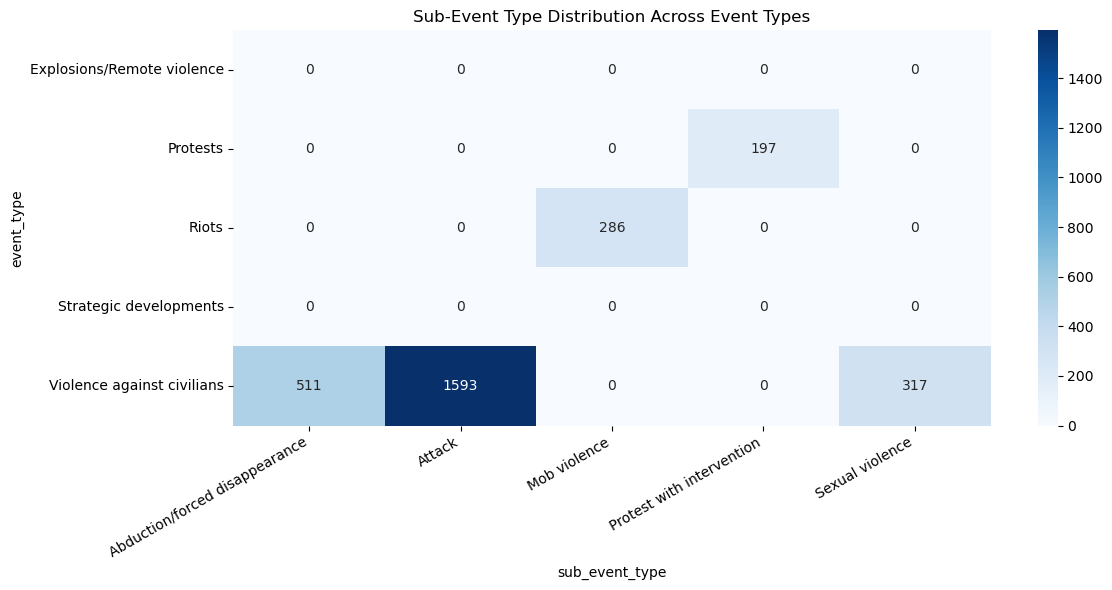

In [8]:
##EDA - Exploratory Data Analysis

#count of sub_event_type under each event_type
subevent_dist = filtered_df.groupby(['event_type', 'sub_event_type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(subevent_dist, annot=True, fmt='d', cmap='Blues')
plt.title("Sub-Event Type Distribution Across Event Types")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

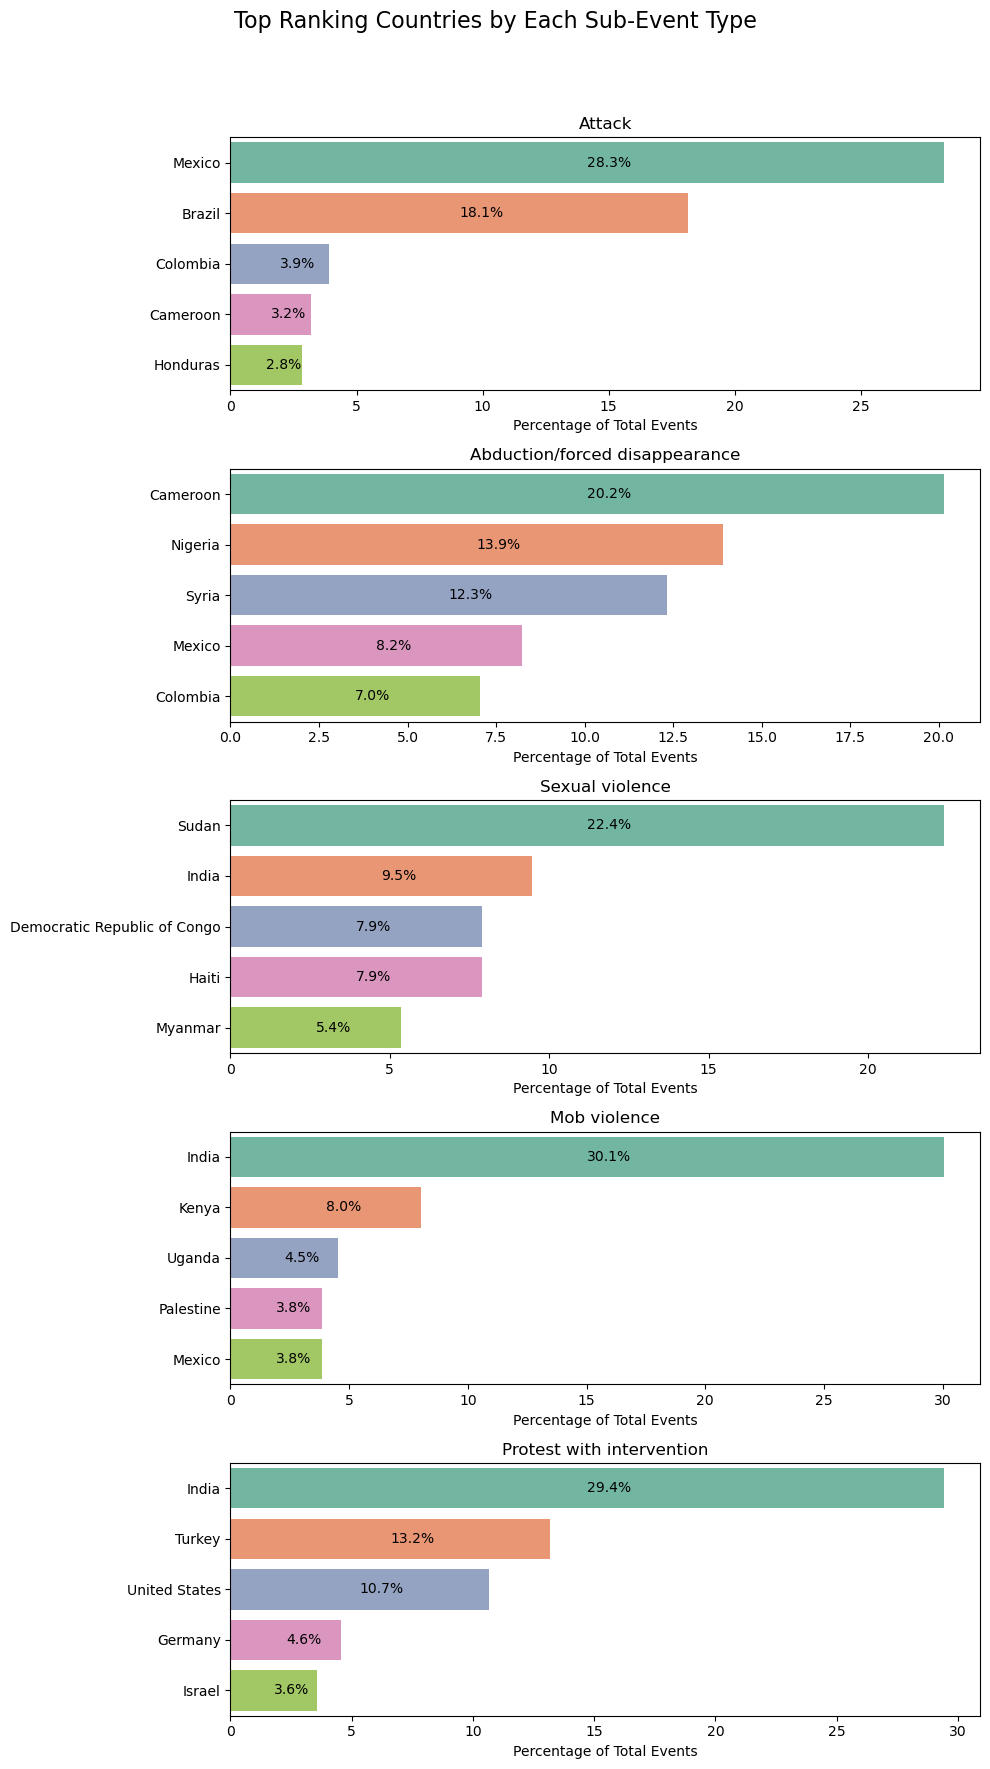

In [9]:
#percentage bar charts
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 18), sharex=False)
fig.suptitle('Top Ranking Countries by Each Sub-Event Type', fontsize=16)

for i, event_type in enumerate(top_5_sub_events):
    df_event = filtered_df[filtered_df['sub_event_type'] == event_type].copy()
    
    df_event['country'] = df_event['country'].astype(str)

    #count and normalise to percentages
    country_counts = df_event['country'].value_counts(normalize=True).head(5) * 100

    sns.barplot(
        x=country_counts.values,
        y=country_counts.index,
        ax=axes[i],
        palette='Set2',
    )

    #add percentage labels to bars
    for j, value in enumerate(country_counts.values):
        axes[i].text(
            value / 2, j,
            f"{value:.1f}%",
            va='center',
            fontsize=10,
            color='black'
        )

    axes[i].set_title(event_type)
    axes[i].set_xlabel('Percentage of Total Events')
    axes[i].set_ylabel('') 


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

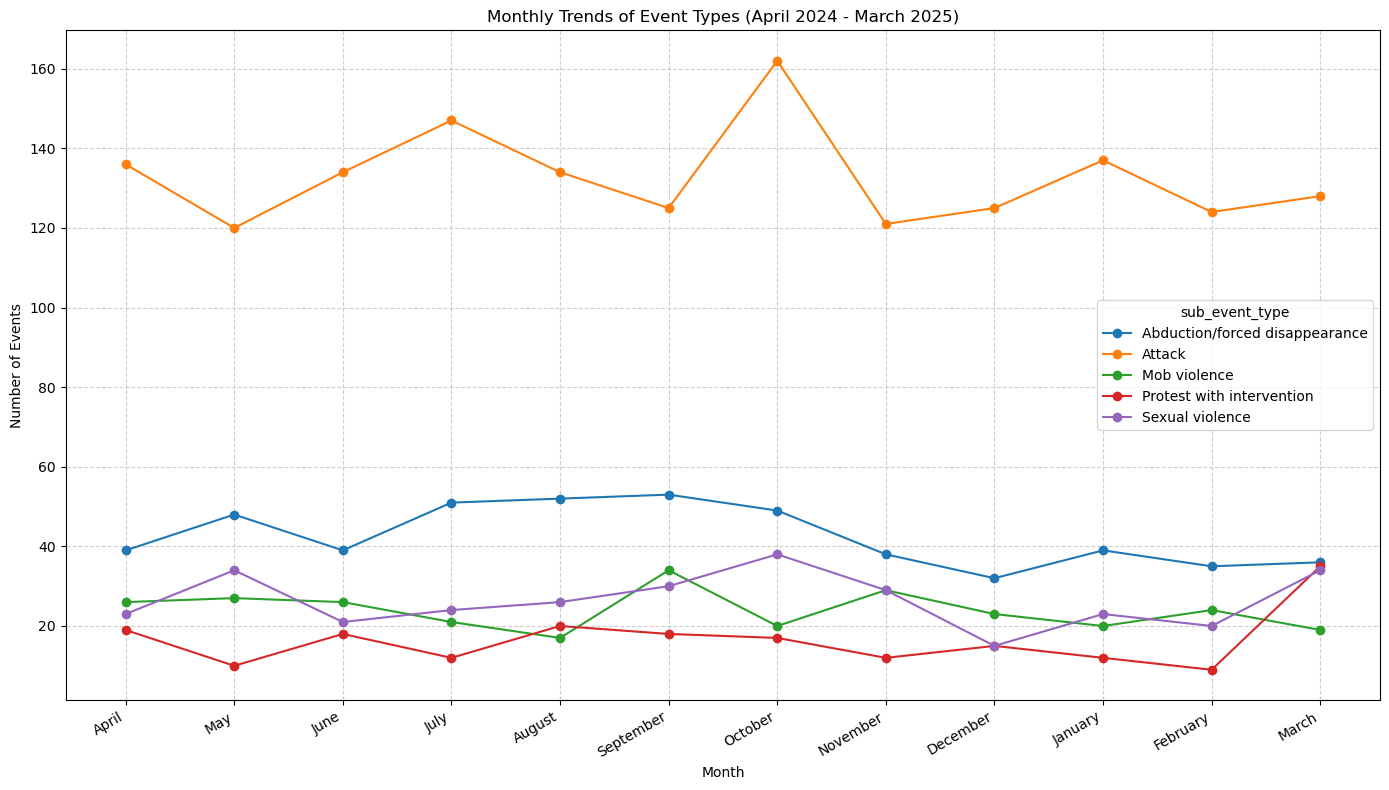

In [10]:
import calendar

#add month and month name if not already
filtered_df['month'] = filtered_df['event_date'].dt.month
filtered_df['month_name'] = filtered_df['event_date'].dt.month_name()

#define correct month order: April to March
month_order = [
    'April', 'May', 'June', 'July', 'August', 'September',
    'October', 'November', 'December', 'January', 'February', 'March'
]

#create crosstab
monthly_trends = pd.crosstab(filtered_df['month_name'], filtered_df['sub_event_type'])

#reindex according to custom April-to-March order
monthly_trends = monthly_trends.reindex(month_order)

#plot
monthly_trends.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Monthly Trends of Event Types (April 2024 - March 2025)')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(ticks=range(12), labels=month_order, rotation=30, ha='right')
plt.tight_layout()
plt.show()

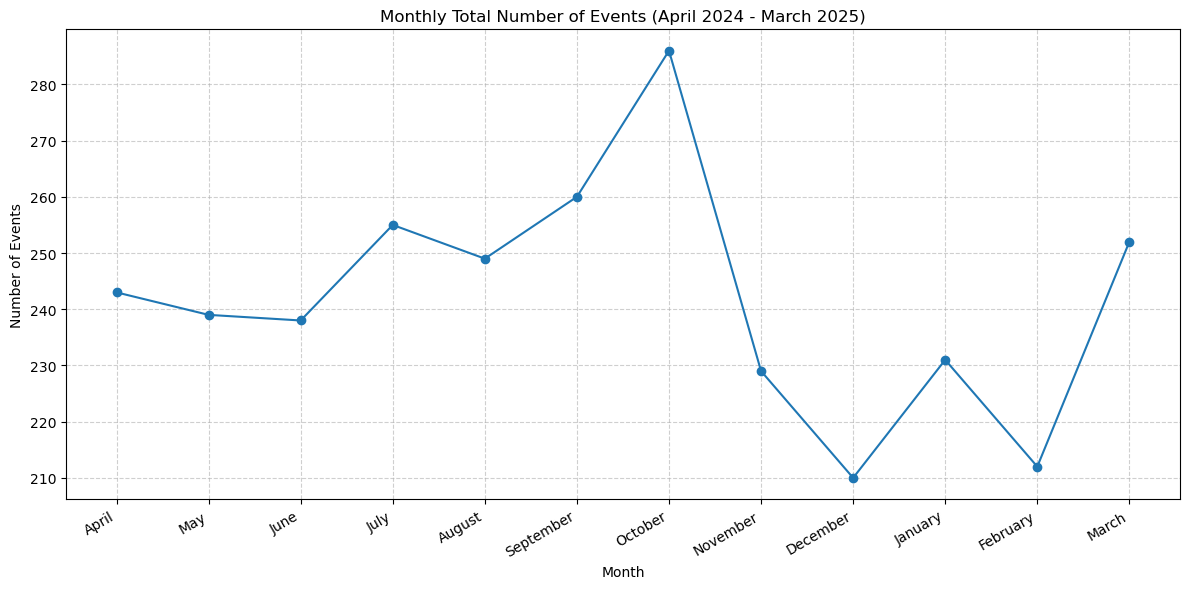

In [11]:

filtered_df['month'] = filtered_df['event_date'].dt.month
filtered_df['month_name'] = filtered_df['event_date'].dt.month_name()

#custom month order (April to March)
month_order = [
    'April', 'May', 'June', 'July', 'August', 'September',
    'October', 'November', 'December', 'January', 'February', 'March'
]

#count total events per month
monthly_totals = filtered_df['month_name'].value_counts().reindex(month_order)

#plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_totals.index, monthly_totals.values, marker='o')
plt.title('Monthly Total Number of Events (April 2024 - March 2025)')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


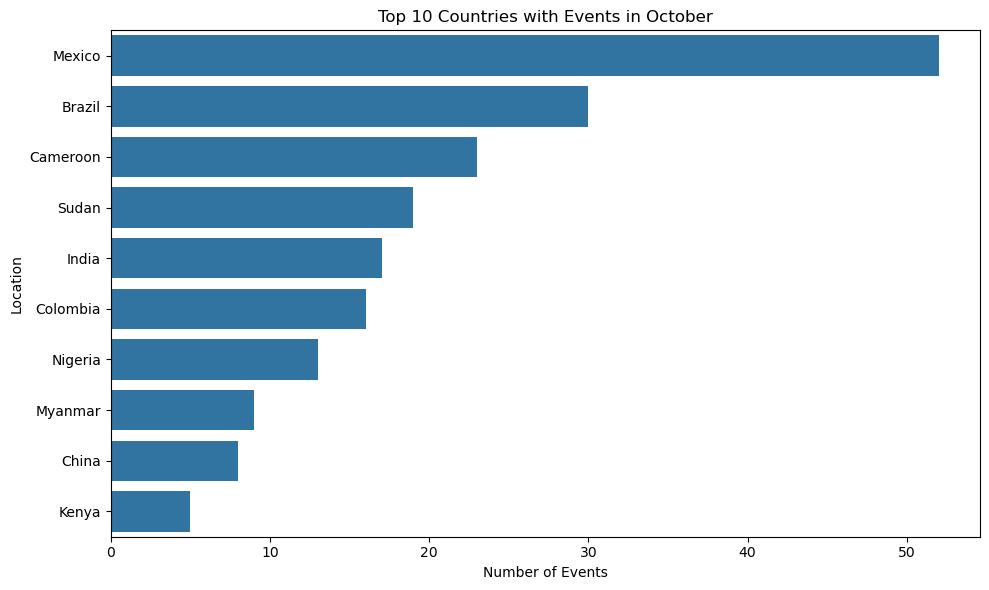

In [12]:
#October inspection
#events in October
October_events = filtered_df[filtered_df['month_name'] == 'October']

#locations 
location_counts = October_events['country'].astype(str).value_counts().reset_index()
location_counts.columns = ['Location', 'Number of Events']

#top locations
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Events', y='Location', data=location_counts.head(10))
plt.title('Top 10 Countries with Events in October')
plt.tight_layout()
plt.show()

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'Abduction/forced disappearance'),
  Text(1.5, 0, 'Attack'),
  Text(2.5, 0, 'Mob violence'),
  Text(3.5, 0, 'Protest with intervention'),
  Text(4.5, 0, 'Sexual violence')])

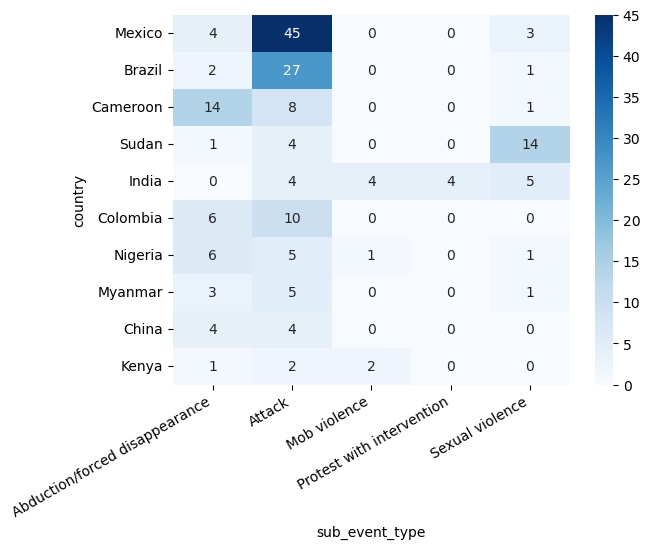

In [13]:
#breakdown by country and event type
location_event_breakdown = pd.crosstab(October_events['country'].astype(str), October_events['sub_event_type'])

top_countries = October_events['country'].astype(str).value_counts().head(10).index
location_event_breakdown = location_event_breakdown.loc[top_countries]

sns.heatmap(location_event_breakdown, annot=True, fmt="d", cmap="Blues")
plt.xticks(rotation=30, ha='right')

In [14]:
#text preparation (notes)
#!pip install nltk 
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


#*only need to download once*#
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

#for the punkt_tab error
#!pip install spacy
#!python -m spacy download en_core_web_sm
#!pip install -U NLTK
#!pip install punkt_tab
#nltk.download('punkt_tab')

#nltk.data.find('tokenizers/punkt')
#nltk.download('punkt', force=True)


In [15]:
#texts cleaning function
months = r'\b(?:january|february|march|april|may|june|july|august|september|october|november|december)\b'
number_words = set([
    'zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten',
    'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen', 'sixteen',
    'seventeen', 'eighteen', 'nineteen', 'twenty', 'thirty', 'forty',
    'fifty', 'sixty', 'seventy', 'eighty', 'ninety', 'hundred', 'thousand', 'million', 'billion'
])

def clean_text(text):
    if isinstance(text, str):
        #lowercase
        text = text.lower()

        #remove speaical characters, numerbs, and extra whitespace
        text = re.sub(r'[^\w\s]', ' ', text) #remove all special characters
        text = re.sub(r'\d+', ' ', text) #remove all numbers
        text = re.sub(r'\s+', ' ', text).strip() #standardise whitespace
        text = re.sub(r'\b(?:on|On)?\s*\d+\s*' + months + r'\s*\d{4},?\s*', '', text) #remove dates with month names
        text = re.sub(months, '', text)

        #tokenisation
        tokens = word_tokenize(text)

        #remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]

        #remove english number words
        tokens = [word for word in tokens if word not in number_words]
        
        #lemmatisation
        lemmatiser = WordNetLemmatizer()
        tokens = [lemmatiser.lemmatize(word) for word in tokens]

        return ' '.join(tokens)
    return ''  

In [16]:
#apply the text cleaning function to the notes column
filtered_df['cleaned_notes'] = filtered_df['notes'].astype(str).apply(clean_text)


In [17]:
#get one random sample from each event type
print("\nSample of original vs cleaned text for each sub-event type):")

import random

#get all unique event types
sub_et = filtered_df['sub_event_type'].unique()

for sub_event in sub_et:
    #filter rows for this event type
    type_df = filtered_df[filtered_df['sub_event_type'] == sub_event]
    
    # Skip if no samples exist
    if len(type_df) == 0:
        continue
        
    #pick a random row
    random_idx = random.choice(type_df.index)

    original_text = filtered_df.loc[random_idx, 'notes']
    cleaned_text = filtered_df.loc[random_idx, 'cleaned_notes']
    
    #print the event type and text samples
    print(f"\nEvent Type: {sub_event}")
    print(f"Original: {original_text[:200]}...")
    print(f"Cleaned: {cleaned_text[:200]}...")


Sample of original vs cleaned text for each sub-event type):

Event Type: Attack
Original: On 8 June 2024, in Ararangua (Santa Catarina), an armed individual who arrived with two accomplices shot and killed a woman in the Mato Alto neighborhood. Authorship and motivation of the attack are u...
Cleaned: ararangua santa catarina armed individual arrived accomplice shot killed woman mato alto neighborhood authorship motivation attack unknown fatality...

Event Type: Protest with intervention
Original: On 8 March 2025, in Medellin - Central West (Antioquia), women and feminist groups marched from San Javier Cemetery to Plaza de Banderas at Atanasio Girardot Stadium to commemorate International Women...
Cleaned: medellin central west antioquia woman feminist group marched san javier cemetery plaza de banderas atanasio girardot stadium commemorate international woman day demonstrator protested femicides sexual...

Event Type: Abduction/forced disappearance
Original: On 25 July 2024, in Huar

In [18]:
#feature extraction
#TF-IDF vectorisation (get uniqueness of words for each note)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectoriser = TfidfVectorizer(max_features=5000) 
X_tfidf = tfidf_vectoriser.fit_transform(filtered_df['cleaned_notes'])

#get feature names for later analysis
feature_names = tfidf_vectoriser.get_feature_names_out()



Top 20 terms in October events:
              term      score
2329         woman  15.144251
1138        killed  10.279387
1961          shot   8.846747
758       fatality   8.731832
142          armed   8.674330
2231       unknown   8.259597
144         around   8.158106
2272        victim   7.427718
575             de   7.269990
1640        police   7.001744
889          group   6.850700
4         abducted   6.508242
1787      reported   6.357802
2072       suspect   6.243191
2226  unidentified   6.174172
1018       injured   6.035141
1325        member   5.982415
172         attack   5.452952
457          coded   5.293618
1012    individual   4.884771


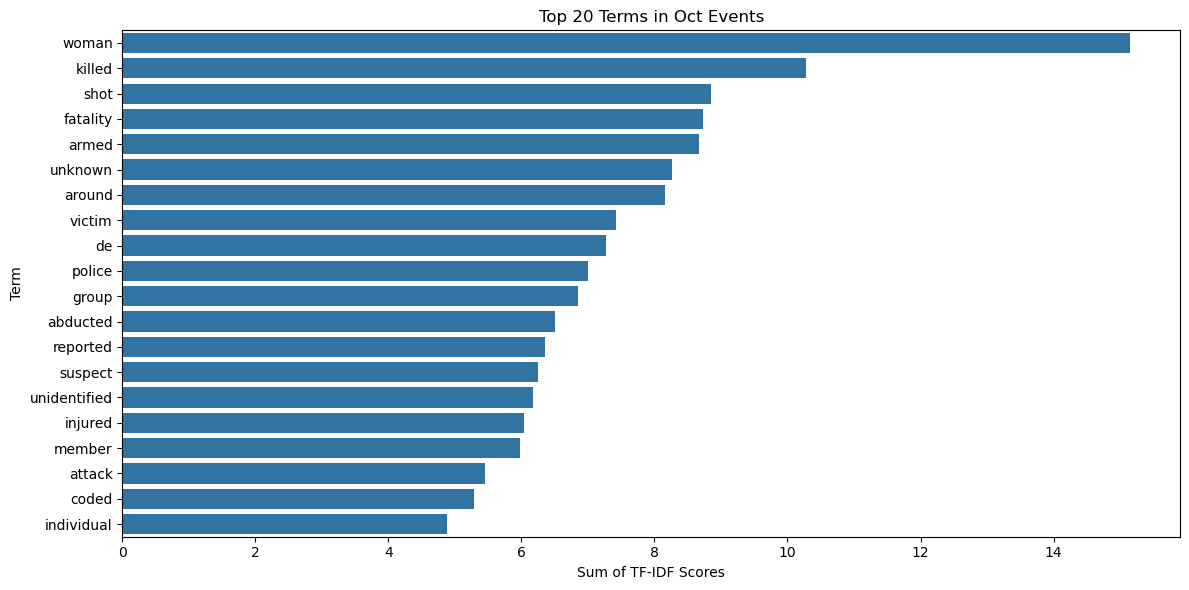

In [19]:
#October 
oct_events = filtered_df[filtered_df['month_name'] == 'October'].copy()

#create a new TF-IDF vectorizer specifically for October events
oct_vectoriser = TfidfVectorizer(max_features=5000)
oct_tfidf = oct_vectoriser.fit_transform(oct_events['cleaned_notes'].tolist())
oct_features = oct_vectoriser.get_feature_names_out()

#get sum of TF-IDF scores for each term
oct_scores = np.array(oct_tfidf.sum(axis=0)).flatten()

#create dataframe of terms and scores
oct_term_df = pd.DataFrame({
    'term': oct_features,
    'score': oct_scores
})

#sort by score
oct_term_df = oct_term_df.sort_values('score', ascending=False)

#display top terms
print("Top 20 terms in October events:")
print(oct_term_df.head(20))

#visualise
plt.figure(figsize=(12, 6))
sns.barplot(x='score', y='term', data=oct_term_df.head(20))
plt.title('Top 20 Terms in Oct Events')
plt.xlabel('Sum of TF-IDF Scores')
plt.ylabel('Term')
plt.tight_layout()
plt.show()

In [20]:
y = filtered_df['sub_event_type'] #target variable

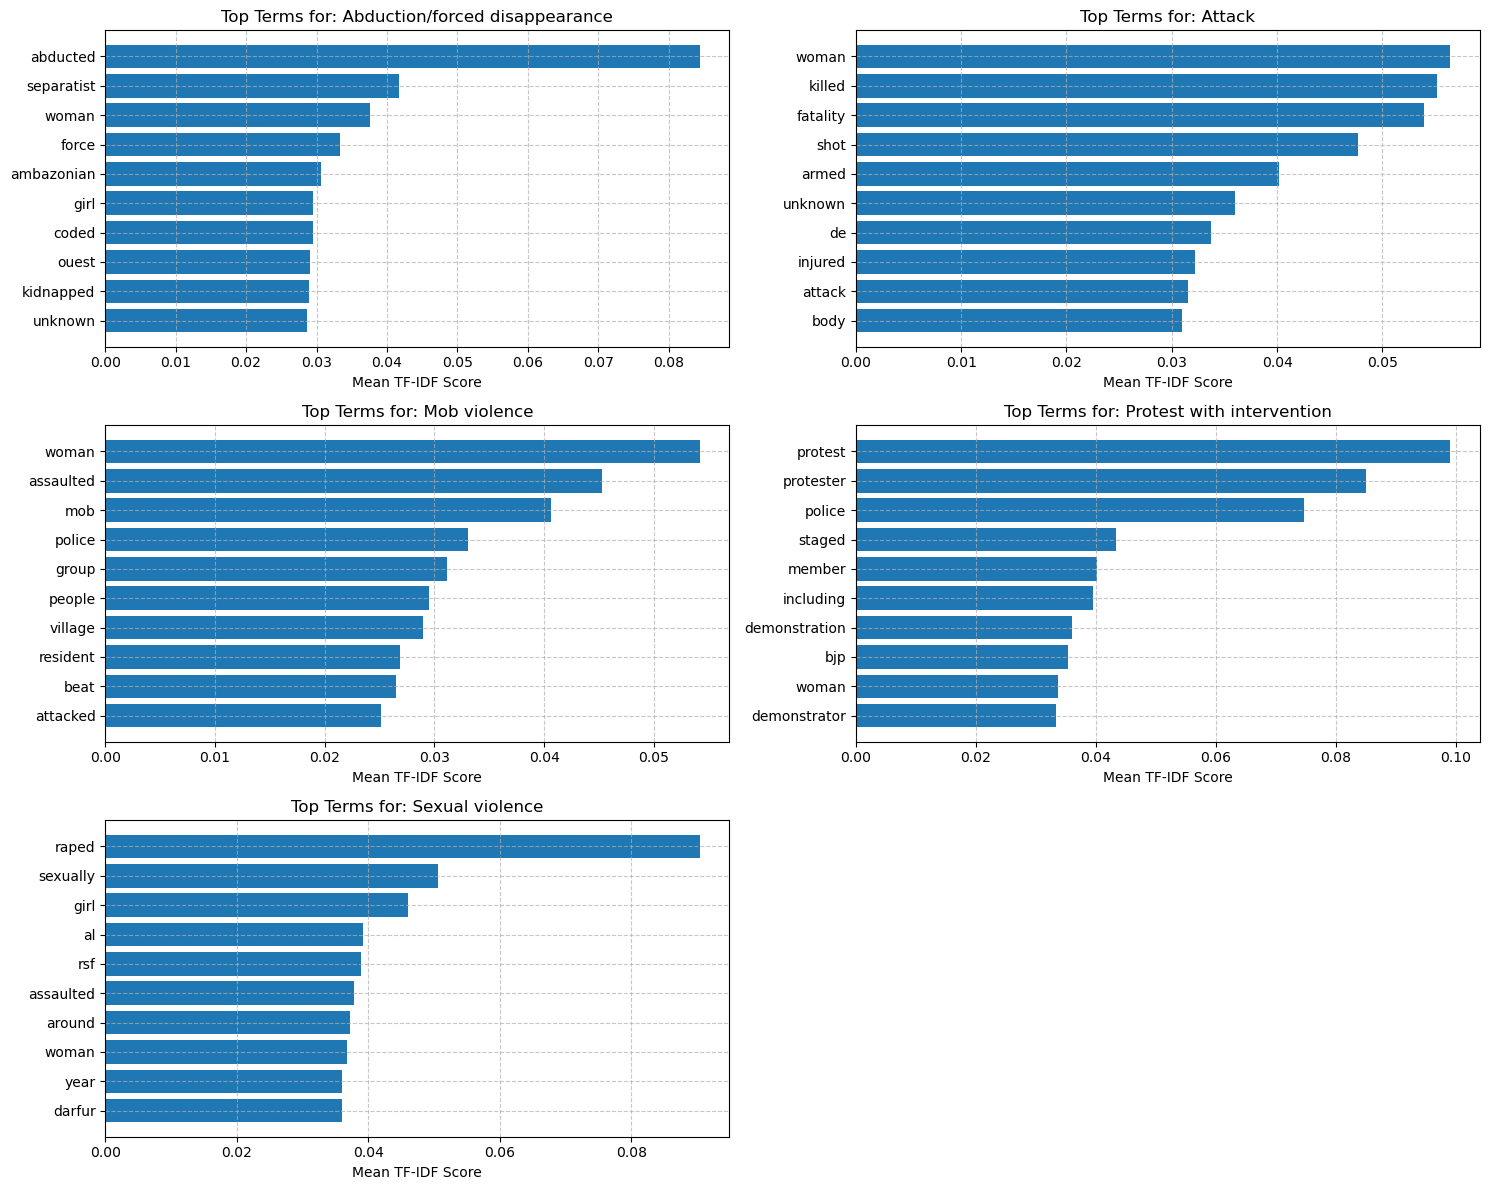

In [52]:
#important words for each event type
def plot_top_terms_by_class(vectorizer, X, y, n_terms=10):
    
    #convert sparse matrix to dense for easier manipulation
    X_dense = X.toarray()
    
    plt.figure(figsize=(15, 12))
    for i, category in enumerate(sorted(set(y))):
        indices = y == category
        
        # Calculate mean TF-IDF score for each term in this class
        tfidf_means = np.mean(X_dense[indices], axis=0)
        
        # Get indices of top terms
        top_indices = np.argsort(tfidf_means)[-n_terms:]
        top_terms = [feature_names[idx] for idx in top_indices]
        top_scores = [tfidf_means[idx] for idx in top_indices]

        # Plot
        plt.subplot(3, 2, i+1)
        plt.barh(top_terms, top_scores)
        plt.title(f'Top Terms for: {category}')
        plt.xlabel('Mean TF-IDF Score')
        plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    
plot_top_terms_by_class(tfidf_vectoriser, X_tfidf, y)


In [22]:
#ML models classification

from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, filtered_df['sub_event_type'], 
    test_size=0.3, 
    random_state=1, 
    stratify = filtered_df['sub_event_type']  
)

In [23]:
#SVM (non-linear SVM classifier with probabilities)
#simple non-linear SVM
svm_cs = SVC(kernel='rbf', probability=True)
calibrated_svm = CalibratedClassifierCV(svm_cs, method='sigmoid')
calibrated_svm.fit(X_train, y_train)


CalibratedClassifierCV(estimator=SVC(probability=True))

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [25]:
#train a tuned SVM model with probability estimates
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['rbf']} 
grid = GridSearchCV(svm_cs,param_grid, cv=5, n_jobs=-1, verbose=2)
grid.fit(X_train,y_train)

grid.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [26]:
new_svm_cs = grid.best_estimator_

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Abduction/forced disappearance'),
  Text(1, 0, 'Attack'),
  Text(2, 0, 'Mob violence'),
  Text(3, 0, 'Protest with intervention'),
  Text(4, 0, 'Sexual violence')])

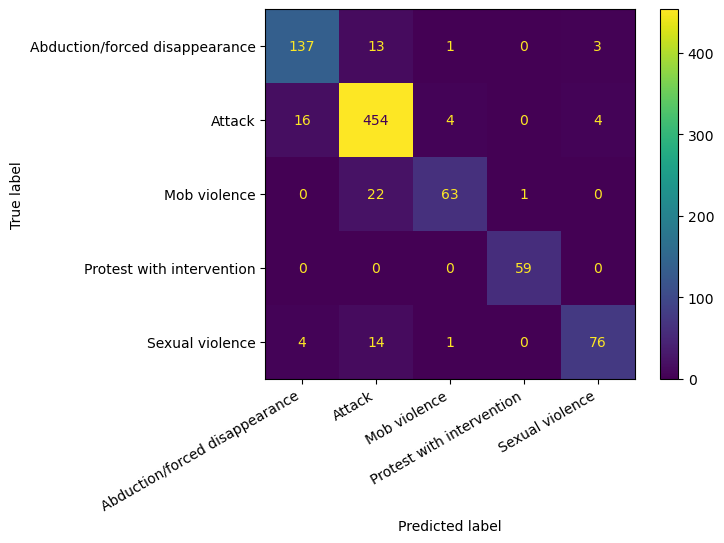

In [27]:
#confusion matrix
ConfusionMatrixDisplay.from_estimator(new_svm_cs, X_test, y_test)
plt.xticks(rotation=30, ha='right')

In [29]:
#get predictions and confidence scores on the test set
svm_preds = new_svm_cs.predict(X_test)
svm_probs = new_svm_cs.predict_proba(X_test)
svm_confidence = np.max(svm_probs, axis=1)

In [31]:
#accuracy score
new_svm_accuracy = accuracy_score(y_test, svm_preds)
print(new_svm_accuracy)

#classification report
print(classification_report(y_test, svm_preds))

0.9048165137614679
                                precision    recall  f1-score   support

Abduction/forced disappearance       0.87      0.89      0.88       154
                        Attack       0.90      0.95      0.93       478
                  Mob violence       0.91      0.73      0.81        86
     Protest with intervention       0.98      1.00      0.99        59
               Sexual violence       0.92      0.80      0.85        95

                      accuracy                           0.90       872
                     macro avg       0.92      0.87      0.89       872
                  weighted avg       0.91      0.90      0.90       872



In [32]:
#RF
#hyper-parameter tuning using cross-validation
rf_param_grid = {
    'max_depth': [10,40],
    'n_estimators': [100]
}
#create a based RF model
rf_model = RandomForestClassifier()
rf_grid_search = GridSearchCV(estimator = rf_model, param_grid = rf_param_grid,
                              cv = 5, #number of folds for cross validation
                              n_jobs = -1, #use all processors
                              verbose = 2)

rf_grid_search.fit(X_train, y_train)
rf_model = rf_grid_search.best_estimator_
y_pred_rf = rf_model.predict(X_test)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [33]:
rf_probs = rf_model.predict_proba(X_test)
rf_confidence = np.max(rf_probs, axis=1)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Abduction/forced disappearance'),
  Text(1, 0, 'Attack'),
  Text(2, 0, 'Mob violence'),
  Text(3, 0, 'Protest with intervention'),
  Text(4, 0, 'Sexual violence')])

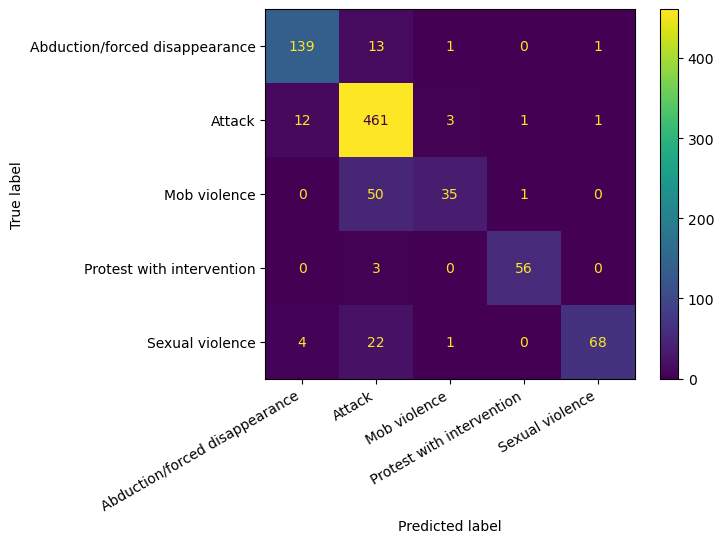

In [53]:
#confusion matrix
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.xticks(rotation=30, ha='right')

In [34]:
#a dataframe with test results from SVM and RF
test_results = pd.DataFrame({
    'true_label': y_test.values,
    'svm_pred': svm_preds,
    'svm_confidence': svm_confidence,
    'rf_pred': y_pred_rf,
    'rf_confidence': rf_confidence
})

In [35]:
#add correctness flags
test_results['svm_correct'] = test_results['svm_pred'] == test_results['true_label']
test_results['rf_correct'] = test_results['rf_pred'] == test_results['true_label']

In [36]:
#print classification metrics
print("SVM Classification Report:")
print(classification_report(y_test, svm_preds))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

SVM Classification Report:
                                precision    recall  f1-score   support

Abduction/forced disappearance       0.87      0.89      0.88       154
                        Attack       0.90      0.95      0.93       478
                  Mob violence       0.91      0.73      0.81        86
     Protest with intervention       0.98      1.00      0.99        59
               Sexual violence       0.92      0.80      0.85        95

                      accuracy                           0.90       872
                     macro avg       0.92      0.87      0.89       872
                  weighted avg       0.91      0.90      0.90       872


Random Forest Classification Report:
                                precision    recall  f1-score   support

Abduction/forced disappearance       0.90      0.90      0.90       154
                        Attack       0.84      0.96      0.90       478
                  Mob violence       0.88      0.41      0.56      

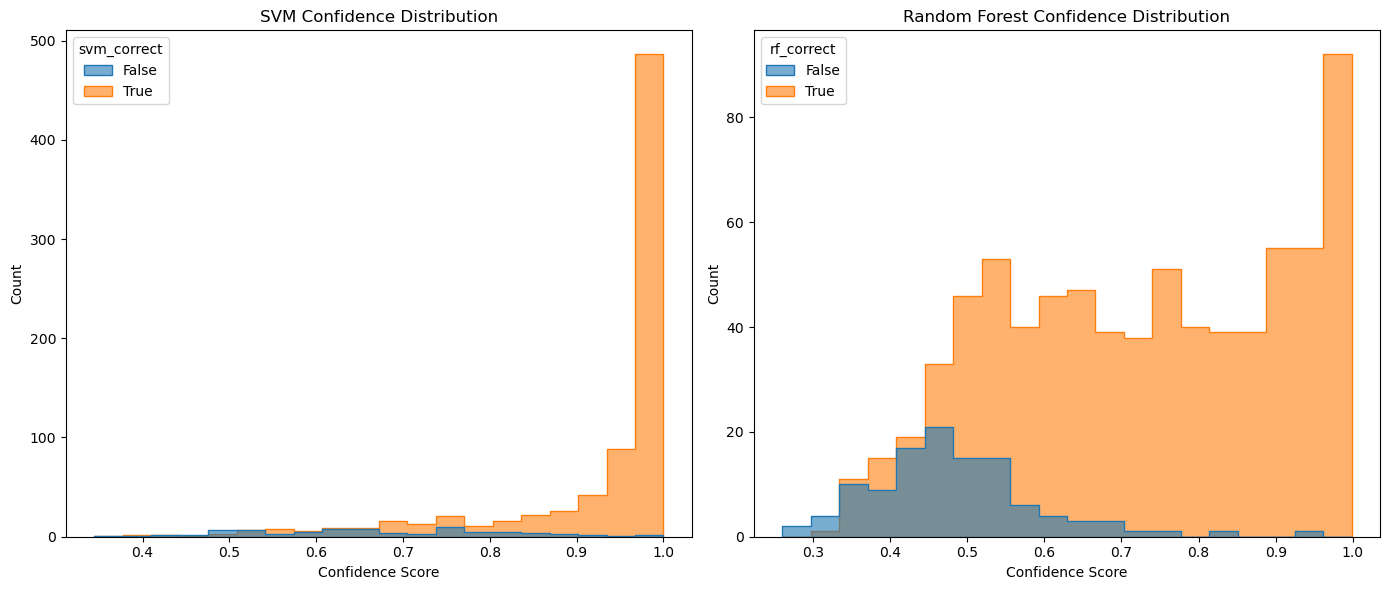

In [37]:
#confidence distributions for correct and incorrect predictions
plt.figure(figsize=(14, 6))

#SVM 
plt.subplot(1, 2, 1)
sns.histplot(data=test_results, x='svm_confidence', hue='svm_correct', 
             bins=20, alpha=0.6, element='step')
plt.title('SVM Confidence Distribution')
plt.xlabel('Confidence Score')
plt.ylabel('Count')

#RF
plt.subplot(1, 2, 2)
sns.histplot(data=test_results, x='rf_confidence', hue='rf_correct', 
             bins=20, alpha=0.6, element='step')
plt.title('Random Forest Confidence Distribution')
plt.xlabel('Confidence Score')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
#test the model on the a different time period of dataset

In [38]:
#identify uncertain classifications
svm_threshold = 0.7
rf_threshold = 0.7

#flag uncertain classifications
test_results['svm_uncertain'] = test_results['svm_confidence'] < svm_threshold
test_results['rf_uncertain'] = test_results['rf_confidence'] < rf_threshold

#count uncertain classifications by event type
svm_uncertain_counts = pd.crosstab(test_results['true_label'], test_results['svm_uncertain'])
rf_uncertain_counts = pd.crosstab(test_results['true_label'], test_results['rf_uncertain'])

print("SVM uncertain classifications by event type:")
print(svm_uncertain_counts)
print("\nRF uncertain classifications by event type:")
print(rf_uncertain_counts)

SVM uncertain classifications by event type:
svm_uncertain                   False  True 
true_label                                  
Abduction/forced disappearance    131     23
Attack                            430     48
Mob violence                       62     24
Protest with intervention          59      0
Sexual violence                    83     12

RF uncertain classifications by event type:
rf_uncertain                    False  True 
true_label                                  
Abduction/forced disappearance     51    103
Attack                            319    159
Mob violence                        2     84
Protest with intervention          30     29
Sexual violence                    13     82


In [40]:
#identify uncertain classifications
svm_threshold = 0.6
rf_threshold = 0.6

#flag uncertain classifications
test_results['svm_uncertain'] = test_results['svm_confidence'] < svm_threshold
test_results['rf_uncertain'] = test_results['rf_confidence'] < rf_threshold

#count uncertain classifications by event type
svm_uncertain_counts = pd.crosstab(test_results['true_label'], test_results['svm_uncertain'])
rf_uncertain_counts = pd.crosstab(test_results['true_label'], test_results['rf_uncertain'])

print("SVM uncertain classifications by event type:")
print(svm_uncertain_counts)
print("\nRF uncertain classifications by event type:")
print(rf_uncertain_counts)

SVM uncertain classifications by event type:
svm_uncertain                   False  True 
true_label                                  
Abduction/forced disappearance    139     15
Attack                            453     25
Mob violence                       78      8
Protest with intervention          59      0
Sexual violence                    86      9

RF uncertain classifications by event type:
rf_uncertain                    False  True 
true_label                                  
Abduction/forced disappearance     76     78
Attack                            376    102
Mob violence                       11     75
Protest with intervention          40     19
Sexual violence                    38     57
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  14.7s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   8.2s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   9.3s
[CV] END .........................C=1

In [ ]:
#uncertainty rates 

In [41]:
from sklearn.metrics import precision_score, recall_score

thresholds = np.arange(0.3, 1.0, 0.05)
svm_results = []

for threshold in thresholds:
    # Filter predictions above threshold
    high_conf_mask = test_results['svm_confidence'] >= threshold
    
    if high_conf_mask.sum() > 0:  # only if some predictions
        y_true = test_results.loc[high_conf_mask, 'true_label']
        y_pred = test_results.loc[high_conf_mask, 'svm_pred']
        
        # Accuracy
        accuracy = (y_pred == y_true).mean()
        
        # Coverage
        coverage = high_conf_mask.mean()
        
        # Precision and Recall (macro average because it's multiclass)
        precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
        recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
        
        svm_results.append({
            'threshold': threshold,
            'accuracy': accuracy,
            'coverage': coverage,
            'precision': precision,
            'recall': recall,
            'retained_samples': high_conf_mask.sum()
        })

# Convert to DataFrame
threshold_df = pd.DataFrame(svm_results)


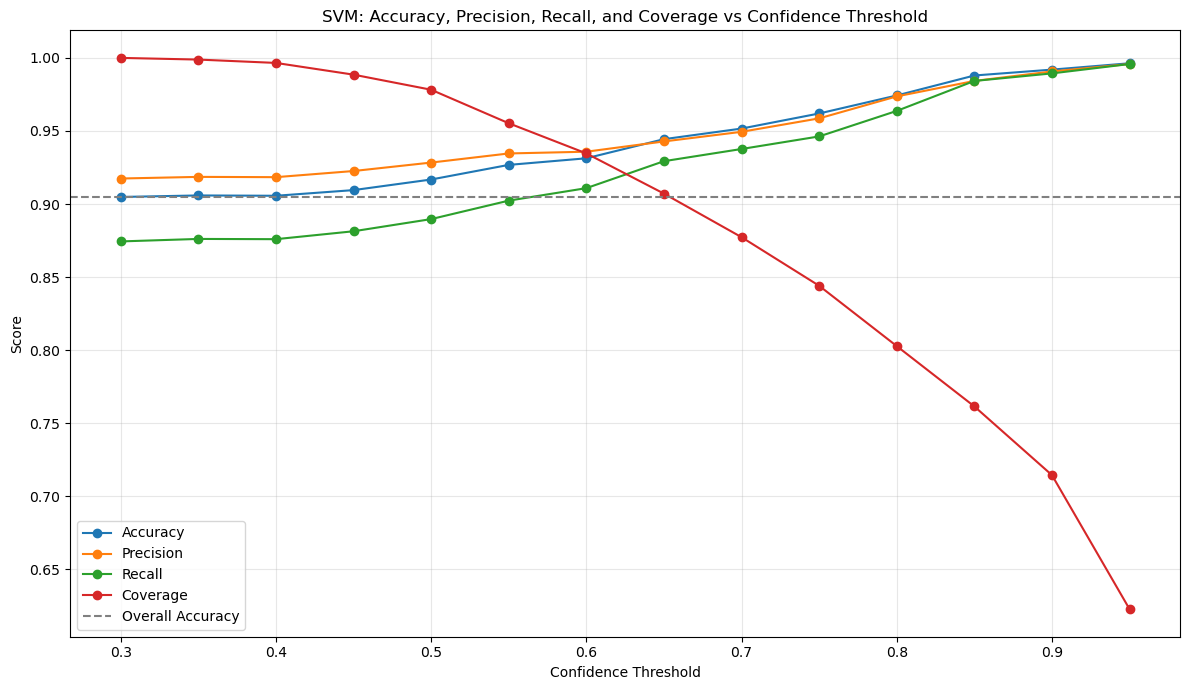

In [42]:
plt.figure(figsize=(12, 7))
plt.plot(threshold_df['threshold'], threshold_df['accuracy'], 'o-', label='Accuracy')
plt.plot(threshold_df['threshold'], threshold_df['precision'], 'o-', label='Precision')
plt.plot(threshold_df['threshold'], threshold_df['recall'], 'o-', label='Recall')
plt.plot(threshold_df['threshold'], threshold_df['coverage'], 'o-', label='Coverage')

plt.axhline(y=(test_results['svm_pred'] == test_results['true_label']).mean(), 
            linestyle='--', color='gray', label='Overall Accuracy')

plt.title('SVM: Accuracy, Precision, Recall, and Coverage vs Confidence Threshold')
plt.xlabel('Confidence Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0.3, 1.0, 0.05)
svm_results = []

for threshold in thresholds:
    high_conf_mask = test_results['svm_confidence'] >= threshold
    
    if high_conf_mask.sum() > 0:
        y_true = test_results.loc[high_conf_mask, 'true_label']
        y_pred = test_results.loc[high_conf_mask, 'svm_pred']
        
        accuracy = (y_pred == y_true).mean()
        coverage = high_conf_mask.mean()
        
        precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
        recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
        f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
        
        svm_results.append({
            'threshold': threshold,
            'accuracy': accuracy,
            'coverage': coverage,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'retained_samples': high_conf_mask.sum()
        })


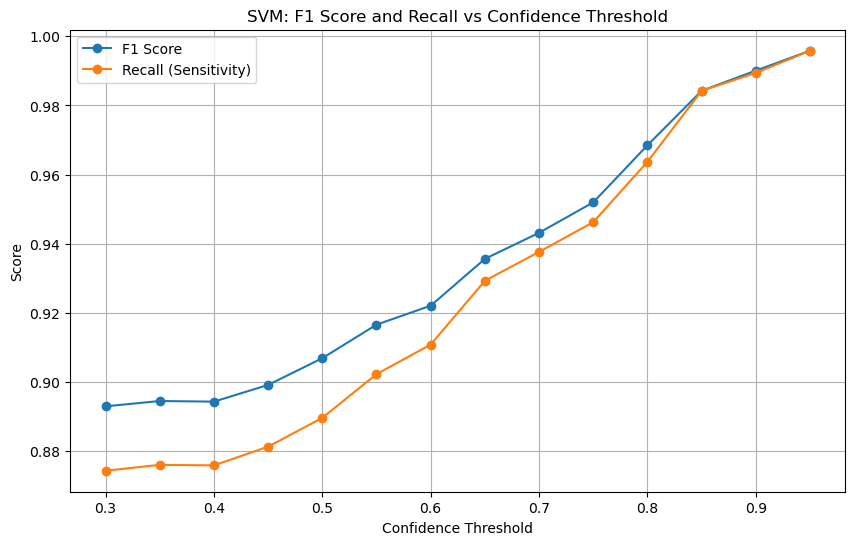

In [55]:
threshold_df = pd.DataFrame(svm_results)

plt.figure(figsize=(10,6))
plt.plot(threshold_df['threshold'], threshold_df['f1'], 'o-', label='F1 Score')
plt.plot(threshold_df['threshold'], threshold_df['recall'], 'o-', label='Recall (Sensitivity)')
plt.title('SVM: F1 Score and Recall vs Confidence Threshold')
plt.xlabel('Confidence Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


In [44]:
#confidence interval

from sklearn.utils import resample

#function to compute bootstrap confidence intervals for accuracy
def bootstrap_accuracy_ci(y_true, y_pred, n_bootstraps=1000, ci=0.95):
    accuracies = []
    n_samples = len(y_true)
    
    for _ in range(n_bootstraps):
        # Sample with replacement
        indices = np.random.choice(n_samples, n_samples, replace=True)
        sample_true = np.array(y_true)[indices]
        sample_pred = np.array(y_pred)[indices]
        
        # Calculate accuracy for this bootstrap sample
        accuracy = accuracy_score(sample_true, sample_pred)
        accuracies.append(accuracy)
    
    # Calculate mean accuracy and confidence interval
    mean_accuracy = np.mean(accuracies)
    lower_bound = np.percentile(accuracies, (1 - ci) * 100 / 2)
    upper_bound = np.percentile(accuracies, 100 - (1 - ci) * 100 / 2)
    
    return mean_accuracy, lower_bound, upper_bound


In [45]:
#calculate accuracy and confidence intervals
svm_acc, svm_lower, svm_upper = bootstrap_accuracy_ci(
    test_results['true_label'], test_results['svm_pred']
)
rf_acc, rf_lower, rf_upper = bootstrap_accuracy_ci(
    test_results['true_label'], test_results['rf_pred']
)

#prepare data for plotting
models = ['SVM', 'Random Forest']
accuracies = [svm_acc, rf_acc]
errors_lower = [svm_acc - svm_lower, rf_acc - rf_lower]
errors_upper = [svm_upper - svm_acc, rf_upper - rf_acc]
errors = np.array([errors_lower, errors_upper])

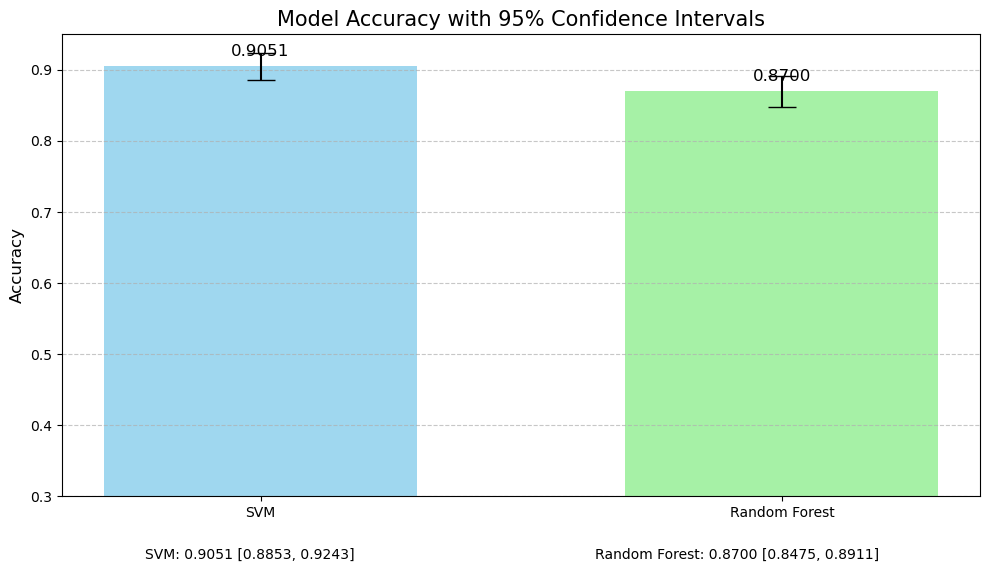

In [46]:
#create the figure
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen'], 
              yerr=errors, capsize=10, alpha=0.8, width=0.6)

#add exact accuracy values on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{accuracies[i]:.4f}',
            ha='center', va='bottom', fontsize=12)
    
#customize plot
plt.title('Model Accuracy with 95% Confidence Intervals', fontsize=15)
plt.ylabel('Accuracy', fontsize=12)
#plt.ylim(min(svm_lower, rf_lower) - 0.05, max(svm_upper, rf_upper) + 0.05)
plt.ylim(0.30, 0.95)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#add confidence interval values in legend
plt.figtext(0.15, 0.01, f'SVM: {svm_acc:.4f} [{svm_lower:.4f}, {svm_upper:.4f}]', 
          fontsize=10, ha='left')
plt.figtext(0.6, 0.01, f'Random Forest: {rf_acc:.4f} [{rf_lower:.4f}, {rf_upper:.4f}]', 
          fontsize=10, ha='left')

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

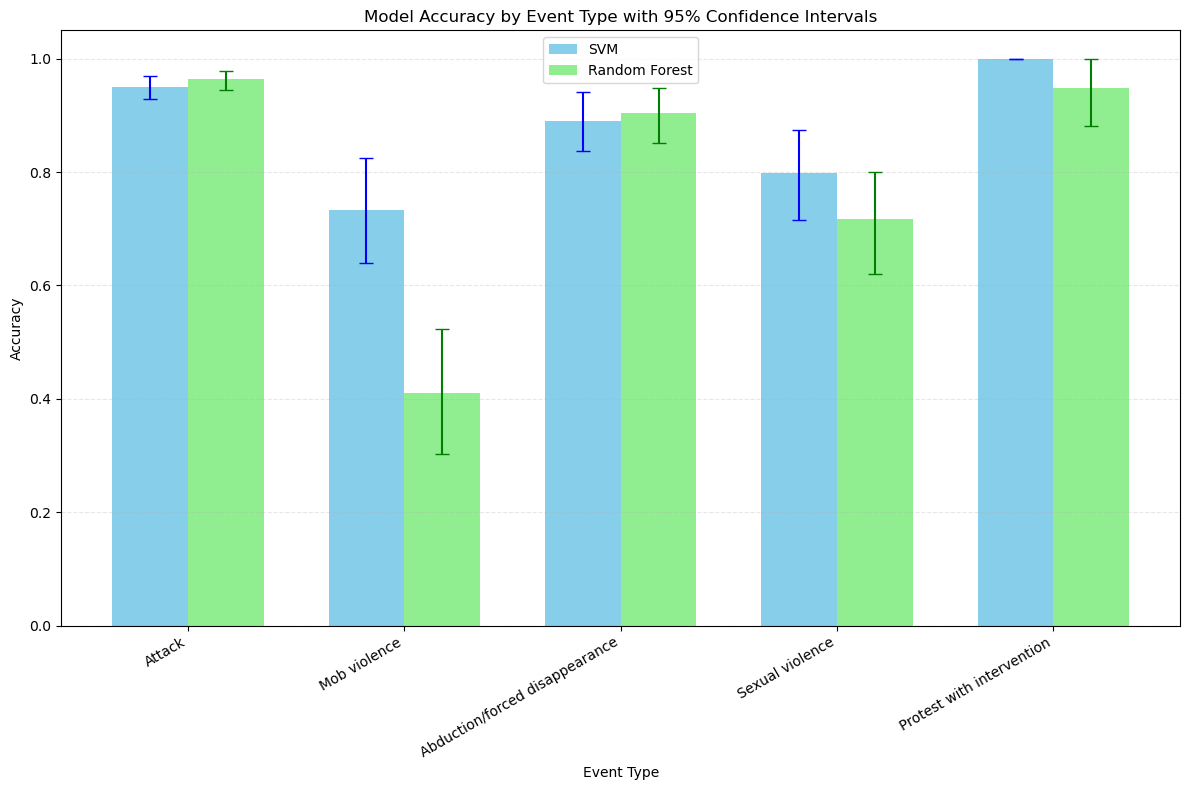

In [47]:
#a more detailed comparison by event type
event_types = test_results['true_label'].unique()
svm_acc_by_type = []
svm_ci_by_type = []
rf_acc_by_type = []
rf_ci_by_type = []

for event_type in event_types:
    #filter by event type
    type_mask = test_results['true_label'] == event_type
    
    #skip if not enough samples
    if type_mask.sum() < 10:
        continue
        
    #calculate accuracy and CI for this event type
    svm_acc, svm_lower, svm_upper = bootstrap_accuracy_ci(
        test_results.loc[type_mask, 'true_label'], 
        test_results.loc[type_mask, 'svm_pred']
    )
    
    rf_acc, rf_lower, rf_upper = bootstrap_accuracy_ci(
        test_results.loc[type_mask, 'true_label'], 
        test_results.loc[type_mask, 'rf_pred']
    )
    
    svm_acc_by_type.append(svm_acc)
    svm_ci_by_type.append((svm_lower, svm_upper))
    
    rf_acc_by_type.append(rf_acc)
    rf_ci_by_type.append((rf_lower, rf_upper))

#create DataFrame for easier plotting
comparison_df = pd.DataFrame({
    'Event Type': event_types,
    'SVM Accuracy': svm_acc_by_type,
    'SVM Lower': [ci[0] for ci in svm_ci_by_type],
    'SVM Upper': [ci[1] for ci in svm_ci_by_type],
    'RF Accuracy': rf_acc_by_type,
    'RF Lower': [ci[0] for ci in rf_ci_by_type],
    'RF Upper': [ci[1] for ci in rf_ci_by_type]
})

#plot by event type
plt.figure(figsize=(12, 8))
x = np.arange(len(event_types))
width = 0.35

svm_bars = plt.bar(x - width/2, comparison_df['SVM Accuracy'], width, 
                 color='skyblue', label='SVM')
rf_bars = plt.bar(x + width/2, comparison_df['RF Accuracy'], width, 
                color='lightgreen', label='Random Forest')

#add error bars
plt.errorbar(x - width/2, comparison_df['SVM Accuracy'], 
           yerr=[(comparison_df['SVM Accuracy'] - comparison_df['SVM Lower']), 
                (comparison_df['SVM Upper'] - comparison_df['SVM Accuracy'])],
           fmt='none', color='blue', capsize=5)

plt.errorbar(x + width/2, comparison_df['RF Accuracy'], 
           yerr=[(comparison_df['RF Accuracy'] - comparison_df['RF Lower']), 
                (comparison_df['RF Upper'] - comparison_df['RF Accuracy'])],
           fmt='none', color='green', capsize=5)

plt.xlabel('Event Type')
plt.ylabel('Accuracy')
plt.title('Model Accuracy by Event Type with 95% Confidence Intervals')
plt.xticks(x, event_types, rotation=30, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [48]:

#create formatted strings with accuracy and CI
comparison_df['SVM Acc w/ CI'] = comparison_df.apply(
    lambda row: f"{row['SVM Accuracy']:.3f} ({row['SVM Lower']:.3f}-{row['SVM Upper']:.3f})", 
    axis=1
)

comparison_df['RF Acc w/ CI'] = comparison_df.apply(
    lambda row: f"{row['RF Accuracy']:.3f} ({row['RF Lower']:.3f}-{row['RF Upper']:.3f})", 
    axis=1
)

table_df = comparison_df[['Event Type', 'SVM Acc w/ CI', 'RF Acc w/ CI']]

#display the table with proper formatting
print("\nAccuracy by Class with 95% Confidence Intervals:")
print(table_df.to_string(index=False))

from IPython.display import display
display(table_df.style.set_caption("Accuracy by Class with 95% Confidence Intervals"))



Accuracy by Class with 95% Confidence Intervals:
                    Event Type       SVM Acc w/ CI        RF Acc w/ CI
                        Attack 0.950 (0.929-0.969) 0.964 (0.946-0.979)
                  Mob violence 0.733 (0.640-0.826) 0.410 (0.302-0.523)
Abduction/forced disappearance 0.889 (0.838-0.942) 0.903 (0.851-0.948)
               Sexual violence 0.799 (0.716-0.874) 0.717 (0.621-0.800)
     Protest with intervention 1.000 (1.000-1.000) 0.949 (0.881-1.000)


,Event Type,SVM Acc w/ CI,RF Acc w/ CI
0,Attack,0.950 (0.929-0.969),0.964 (0.946-0.979)
1,Mob violence,0.733 (0.640-0.826),0.410 (0.302-0.523)
2,Abduction/forced disappearance,0.889 (0.838-0.942),0.903 (0.851-0.948)
3,Sexual violence,0.799 (0.716-0.874),0.717 (0.621-0.800)
4,Protest with intervention,1.000 (1.000-1.000),0.949 (0.881-1.000)


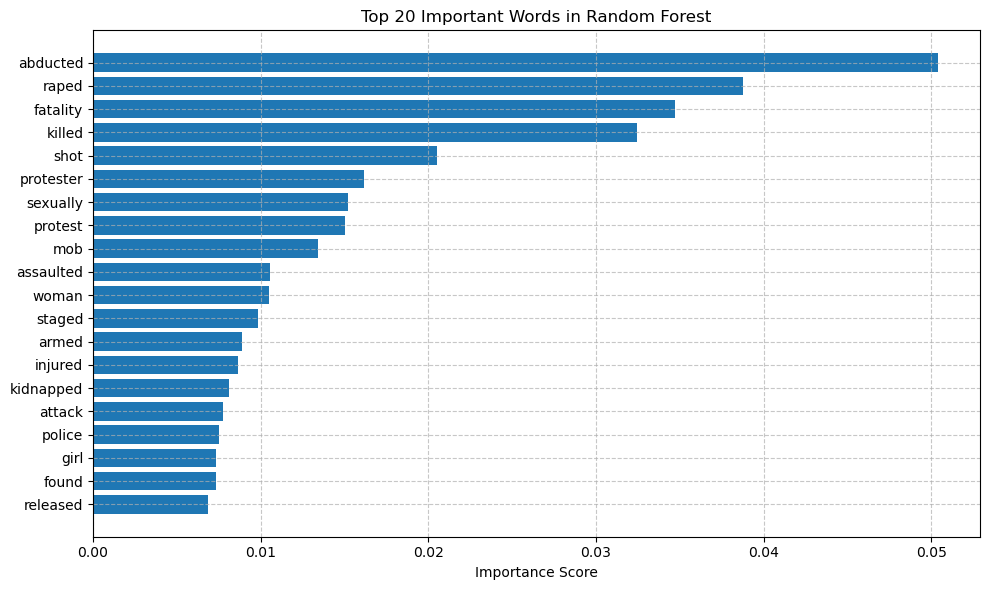

In [50]:
#feature importance
feature_importances_rf = rf_model.feature_importances_

#feature names : feature_names
feature_names = tfidf_vectoriser.get_feature_names_out()

#create a dataframe for plotting
importance_rf = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances_rf
})

#sort by importance
importance_rf = importance_rf.sort_values('importance', ascending=False)

#plot
plt.figure(figsize=(10, 6))
plt.barh(importance_rf.head(20)['feature'], importance_rf.head(20)['importance'])
plt.xlabel('Importance Score')
plt.title('Top 20 Important Words in Random Forest')
plt.gca().invert_yaxis()  # So top feature is at the top
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()